# Save and Load Models

Example created by Samir Angelo Milani Martins

> **Looking for more details on NARMAX models?**
> For comprehensive information on models, methods, and a wide range of examples and benchmarks implemented in SysIdentPy, check out our book:
> [*Nonlinear System Identification and Forecasting: Theory and Practice With SysIdentPy*](https://sysidentpy.org/book/0%20-%20Preface/)
>
> This book provides in-depth guidance to support your work with SysIdentPy.

---
### Obtaining the model using FROLS.

In [1]:
import pandas as pd
from sysidentpy.model_structure_selection import FROLS
from sysidentpy.basis_function import Polynomial
from sysidentpy.parameter_estimation import LeastSquares
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_results
from sysidentpy.utils.save_load import save_model, load_model


# Generating 1 input 1 output sample data from a benchmark system
x_train, x_valid, y_train, y_valid = get_siso_data(
    n=1000, colored_noise=False, sigma=0.0001, train_percentage=90
)

basis_function = Polynomial(degree=2)
estimator = LeastSquares()

model = FROLS(
    order_selection=True,
    n_info_values=3,
    ylag=2,
    xlag=2,
    info_criteria="aic",
    estimator=estimator,
    basis_function=basis_function,
)

model.fit(X=x_train, y=y_train)

yhat = model.predict(X=x_valid, y=y_valid)

# Gathering results
r = pd.DataFrame(
    results(
        model.final_model,
        model.theta,
        model.err,
        model.n_terms,
        err_precision=8,
        dtype="sci",
    ),
    columns=["Regressors", "Parameters", "ERR"],
)

---
### Saving obtained model in file "model_name.syspy"

In [2]:
# save_model(model_variable, file_name.syspy, path (optional))
save_model(model=model, file_name="model_name.syspy")

---
### Loading model and checking if everything went smoothly


 Original model 
       Regressors  Parameters             ERR
0        x1(k-2)  9.0000E-01  9.56631676E-01
1         y(k-1)  1.9999E-01  3.99688899E-02
2  x1(k-1)y(k-1)  1.0000E-01  3.39940092E-03

 Model Loaded from file 
       Regressors  Parameters             ERR
0        x1(k-2)  9.0000E-01  9.56631676E-01
1         y(k-1)  1.9999E-01  3.99688899E-02
2  x1(k-1)y(k-1)  1.0000E-01  3.39940092E-03

 Predictions are the same!


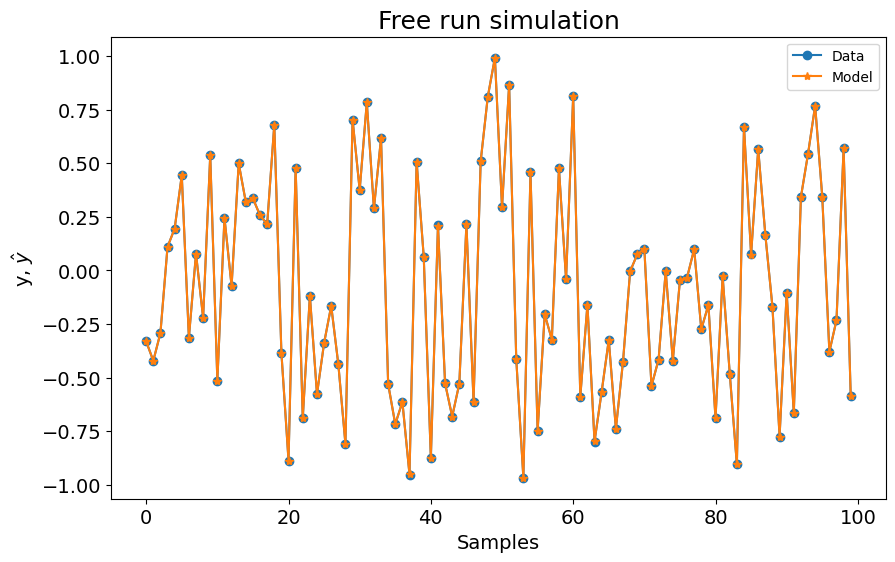

In [3]:
# load_model(file_name.syspy, path (optional))
loaded_model = load_model(file_name="model_name.syspy")

# Predicting output with loaded_model
yhat_loaded = loaded_model.predict(X=x_valid, y=y_valid)

r_loaded = pd.DataFrame(
    results(
        loaded_model.final_model,
        loaded_model.theta,
        loaded_model.err,
        loaded_model.n_terms,
        err_precision=8,
        dtype="sci",
    ),
    columns=["Regressors", "Parameters", "ERR"],
)

# Printing both: original model and model loaded from file
print("\n Original model \n", r)
print("\n Model Loaded from file \n", r_loaded)

# Checking predictions from both: original model and model loaded from file
if (yhat == yhat_loaded).all():
    print("\n Predictions are the same!")

# Ploting results
plot_results(y=y_valid, yhat=yhat_loaded, n=1000)